In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import binned_statistic
from IPython.display import Markdown as md
from IPython.core.display import display, HTML
np.random.seed(42)
sns.set()

In [2]:
switch_df = pd.read_csv("./ARM_Data/arsenic/wells.dat", sep=" ").assign(
    dist_log=lambda x: np.log(x.dist)
)

In [3]:
switch_df

,switch,arsenic,dist,assoc,educ,dist_log
1,1,2.36,16.826000,0,0,2.822925
2,1,0.71,47.321999,0,0,3.856975
3,0,2.07,20.966999,0,10,3.042950
4,1,1.15,21.486000,0,12,3.067402
5,1,1.10,40.874001,1,14,3.710494
...,...,...,...,...,...,...
3016,0,0.52,19.347000,1,5,2.962537
3017,0,1.08,21.386000,1,3,3.062736
3018,0,0.51,7.708000,0,4,2.042259
3019,0,0.64,22.841999,0,3,3.128601


In [4]:
mdl_a = smf.logit(data=switch_df, formula="switch ~ dist_log").fit()
mdl_a.summary()

Optimization terminated successfully.
         Current function value: 0.678356
         Iterations 4


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 switch   No. Observations:                 3020
Model:                          Logit   Df Residuals:                     3018
Method:                           MLE   Df Model:                            1
Date:                Tue, 24 Mar 2020   Pseudo R-squ.:                0.005058
Time:                        00:14:16   Log-Likelihood:                -2048.6
converged:                       True   LL-Null:                       -2059.0
Covariance Type:            nonrobust   LLR p-value:                 5.022e-06
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.0197      0.163      6.251      0.000       0.700       1.339
dist_log      -0.2004      0.044     -4.526      0.000      -0.287      -0.114
==============================================================================
"""

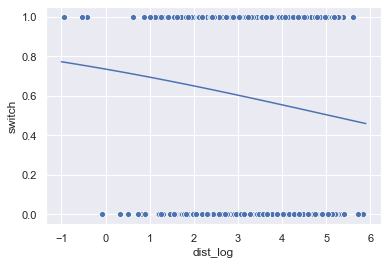

In [5]:
xd = np.arange(-1, 6, 0.1)
xy = mdl_a.predict(pd.DataFrame({'dist_log': xd}))
ax = sns.scatterplot(data=switch_df, x="dist_log", y="switch")
sns.lineplot(x = xd, y = xy, ax=ax);

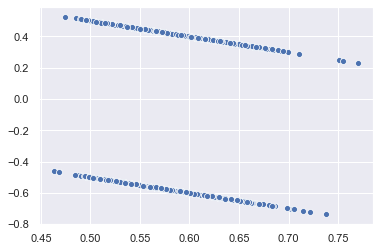

In [6]:
pred_values = mdl_a.predict(switch_df)
sns.scatterplot(x = pred_values, y = switch_df.switch - pred_values);

In [7]:
def ci(data):
    return np.mean(data)

bins=len(pred_values) / 100

bin_mean, bin_x, _ = binned_statistic(
    x=pred_values,
    values=switch_df.switch - pred_values,
    statistic='mean',
    bins=bins
)

bin_cnt, _, _ = binned_statistic(
    x=pred_values,
    values=switch_df.switch - pred_values,
    statistic='count',
    bins=bins
)


binned_residuals = pd.DataFrame({
    'binned_count': bin_cnt, 
    'binned_mean': bin_mean, 
    'prob': bin_x[:-1] 
}).assign(
    binned_ci_upper=lambda x: 2*np.sqrt(x.prob*(1-x.prob)/x.binned_count),
    binned_ci_lower=lambda x: -2*np.sqrt(x.prob*(1-x.prob)/x.binned_count)
)

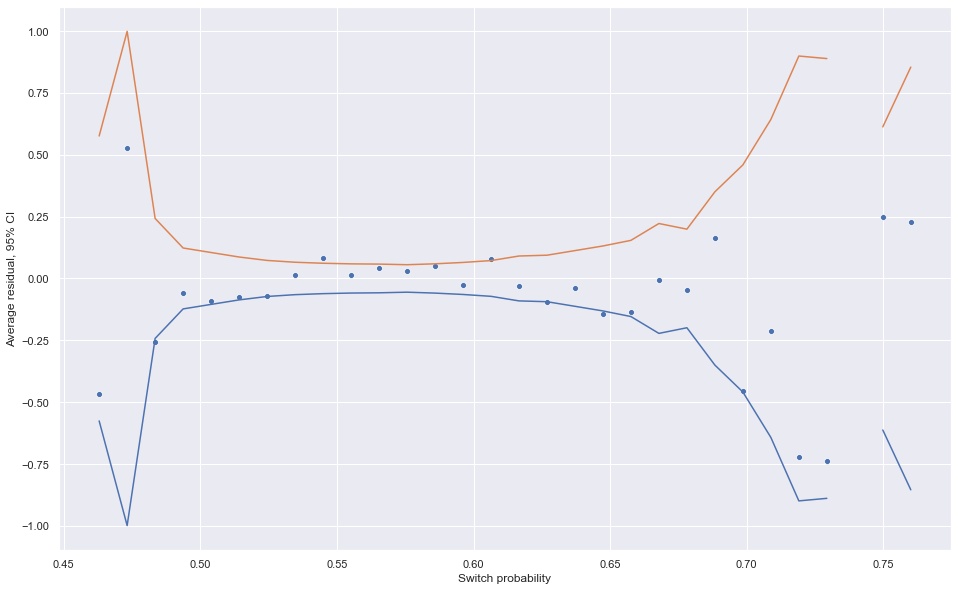

In [8]:
ax = sns.scatterplot(
    data=binned_residuals, x='prob', y='binned_mean'
)
sns.lineplot(data=binned_residuals, x='prob', y='binned_ci_lower', ax=ax)
sns.lineplot(data=binned_residuals, x='prob', y='binned_ci_upper', ax=ax)
ax.set_ylabel('Average residual, 95% CI')
ax.set_xlabel('Switch probability');
ax.figure.set_size_inches(16, 10)

In [9]:
switch_df_cut = switch_df.assign(
    dist_ranges=lambda x: pd.cut(x.dist, [x.dist.min(),100,200,x.dist.max()], include_lowest=True, right=True)
)

In [10]:
switch_df_cut

,switch,arsenic,dist,assoc,educ,dist_log,dist_ranges
1,1,2.36,16.826000,0,0,2.822925,"(0.386, 100.0]"
2,1,0.71,47.321999,0,0,3.856975,"(0.386, 100.0]"
3,0,2.07,20.966999,0,10,3.042950,"(0.386, 100.0]"
4,1,1.15,21.486000,0,12,3.067402,"(0.386, 100.0]"
5,1,1.10,40.874001,1,14,3.710494,"(0.386, 100.0]"
...,...,...,...,...,...,...,...
3016,0,0.52,19.347000,1,5,2.962537,"(0.386, 100.0]"
3017,0,1.08,21.386000,1,3,3.062736,"(0.386, 100.0]"
3018,0,0.51,7.708000,0,4,2.042259,"(0.386, 100.0]"
3019,0,0.64,22.841999,0,3,3.128601,"(0.386, 100.0]"


In [11]:
mdl_b = smf.logit(data=switch_df_cut, formula="switch ~ dist_ranges").fit()
mdl_b.summary()

Optimization terminated successfully.
         Current function value: 0.676271
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 switch   No. Observations:                 3020
Model:                          Logit   Df Residuals:                     3017
Method:                           MLE   Df Model:                            2
Date:                Tue, 24 Mar 2020   Pseudo R-squ.:                0.008116
Time:                        00:14:17   Log-Likelihood:                -2042.3
converged:                       True   LL-Null:                       -2059.0
Covariance Type:            nonrobust   LLR p-value:                 5.526e-08
===========================================================================================================================
                                                              coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------------------
Intercept                                                   0.3736      0.039      9.563      0.000       0.297       0.450
dist_ranges[T.Interval(100.0, 200.0, closed='right')]      -0.6574      0.123     -5.328      0.000      -0.899      -0.416
dist_ranges[T.Interval(200.0, 339.531, closed='right')]    -1.6264      0.803     -2.026      0.043      -3.200      -0.053
===========================================================================================================================
"""

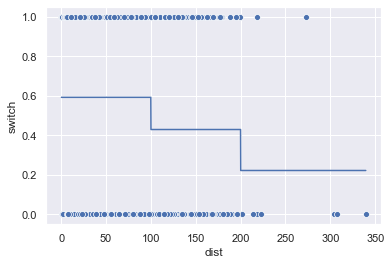

In [12]:
xd = np.append(np.arange(switch_df.dist.min(), switch_df.dist.max(), 0.1), 339.531)
xy = mdl_b.predict(
    pd.DataFrame({'dist': xd}).assign(
        dist_ranges=lambda x: pd.cut(x.dist, [x.dist.min(),100,200,x.dist.max()], include_lowest=True, right=True)
    )
)
ax = sns.scatterplot(data=switch_df, x="dist", y="switch")
sns.lineplot(x = xd, y = xy, ax=ax);

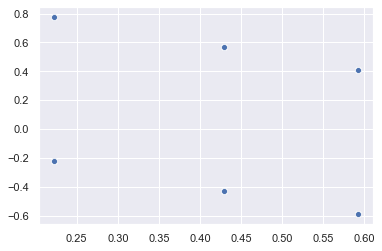

In [13]:
pred_values = mdl_b.predict(switch_df_cut)
sns.scatterplot(x = pred_values, y = switch_df_cut.switch - pred_values);

In [14]:
def ci(data):
    return np.mean(data)

bins=len(pred_values) / 10

bin_mean, bin_x, _ = binned_statistic(
    x=pred_values,
    values=switch_df_cut.switch - pred_values,
    statistic='mean',
    bins=bins
)

bin_cnt, _, _ = binned_statistic(
    x=pred_values,
    values=switch_df_cut.switch - pred_values,
    statistic='count',
    bins=bins
)


binned_residuals = pd.DataFrame({
    'binned_count': bin_cnt, 
    'binned_mean': bin_mean, 
    'prob': bin_x[:-1] 
}).assign(
    binned_ci_upper=lambda x: 2*np.sqrt(x.prob*(1-x.prob)/x.binned_count),
    binned_ci_lower=lambda x: -2*np.sqrt(x.prob*(1-x.prob)/x.binned_count)
)

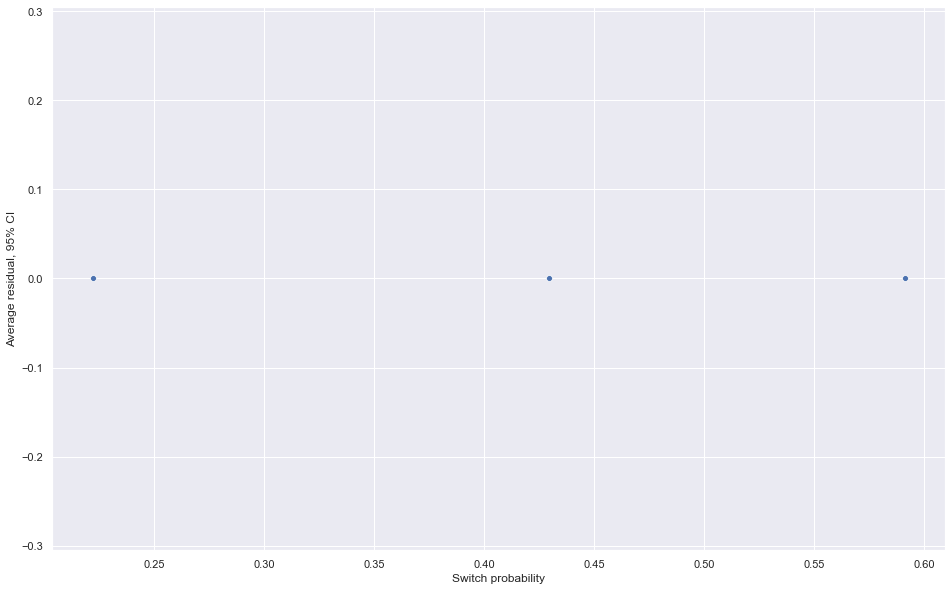

In [15]:
ax = sns.scatterplot(
    data=binned_residuals, x='prob', y='binned_mean'
)
sns.lineplot(data=binned_residuals, x='prob', y='binned_ci_lower', ax=ax)
sns.lineplot(data=binned_residuals, x='prob', y='binned_ci_upper', ax=ax)
ax.set_ylabel('Average residual, 95% CI')
ax.set_xlabel('Switch probability');
ax.figure.set_size_inches(16, 10)